In [55]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.keras
from sklearn import datasets
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [56]:
np.random.seed(0)

In [57]:
n_pts = 500
X, y = datasets.make_circles(n_samples=n_pts, random_state=123, noise=0.1, factor=0.2)

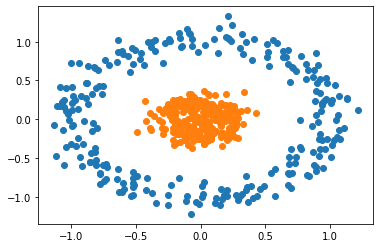

In [58]:
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])

In [59]:
model = Sequential()
# Hidden Layer with Two Inputs and 4 Neurons
model.add(Dense(4, input_shape=(2,), activation='sigmoid'))
# Output Layer densely connected to hidden layer
model.add(Dense(1, activation='sigmoid'))
model.compile(Adam(lr=0.01), 'binary_crossentropy', metrics=['accuracy'])


In [60]:
h = model.fit(x=X, y=y, verbose=1, batch_size=20, epochs=100, shuffle='true')

Epoch 1/100
25/25 [==============================] - 0s 933us/step - loss: 0.7318 - accuracy: 0.4913
Epoch 2/100
25/25 [==============================] - 0s 928us/step - loss: 0.6981 - accuracy: 0.5644
Epoch 3/100
25/25 [==============================] - 0s 972us/step - loss: 0.6919 - accuracy: 0.3919
Epoch 4/100
25/25 [==============================] - 0s 920us/step - loss: 0.6947 - accuracy: 0.5443
Epoch 5/100
25/25 [==============================] - 0s 751us/step - loss: 0.6937 - accuracy: 0.6646
Epoch 6/100
25/25 [==============================] - 0s 897us/step - loss: 0.6936 - accuracy: 0.4391
Epoch 7/100
25/25 [==============================] - 0s 859us/step - loss: 0.6942 - accuracy: 0.5624
Epoch 8/100
25/25 [==============================] - 0s 984us/step - loss: 0.6937 - accuracy: 0.4383
Epoch 9/100
25/25 [==============================] - 0s 992us/step - loss: 0.6936 - accuracy: 0.5793
Epoch 10/100
25/25 [==============================] - 0s 907us/step - loss: 0.6929 - accura

Text(0.5, 1.0, 'accuracy')

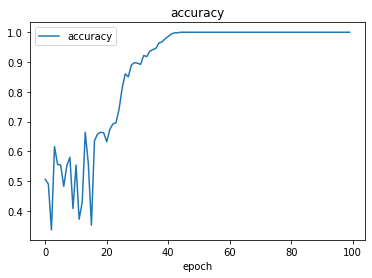

In [61]:
plt.plot(h.history['accuracy'])
plt.xlabel('epoch')
plt.legend(['accuracy'])
plt.title('accuracy')

Text(0.5, 1.0, 'loss')

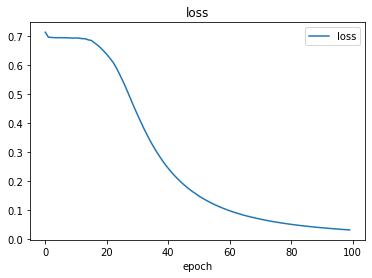

In [62]:
plt.plot(h.history['loss'])
plt.xlabel('epoch')
plt.legend(['loss'])
plt.title('loss')

In [63]:
def plot_decision_boundary(X, y, model):
  x_span = np.linspace(min(X[:, 0]) - 0.25, max(X[:, 0]) + 0.25, 50)
  y_span = np.linspace(min(X[:, 1]) - 0.25, max(X[:, 1]) + 0.25, 50)
  xx, yy = np.meshgrid(x_span, y_span)
  xx_, yy_ = xx.ravel(), yy.ravel()
  grid = np.c_[xx_, yy_]
  pred_func = model.predict(grid)
  z = pred_func.reshape(xx.shape)
  plt.contourf(xx, yy, z)
  

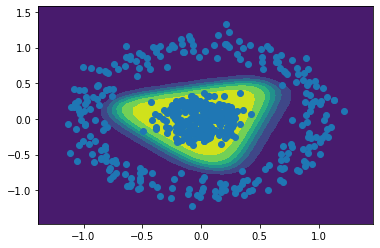

In [64]:
plot_decision_boundary(X, y, model)
plt.scatter(X[:n_pts,0], X[:n_pts,1])
plt.scatter(X[n_pts:,0], X[n_pts:,1])

Prediction is: [[0.9863125]]


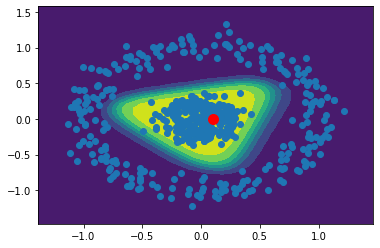

In [65]:
plot_decision_boundary(X, y, model)
plt.scatter(X[:n_pts,0], X[:n_pts,1])
plt.scatter(X[n_pts:,0], X[n_pts:,1])
x = 0.1
y = 0
point = np.array([[x, y]])
prediction = model.predict(point)
plt.plot([x], [y], marker="o", markersize=10, color="red")
print("Prediction is:", prediction)